# Q1. Predicting housing prices

In this problem, you will generate models for predicting house prices from given house features. The file “house_prices.txt” contains the data.

There are four features used in this regression: 

* one binary feature (whether or not the house has covered parking)
* one numerical feature (size, measure in thousands of square meters)
* two categorical features (architectural style and location)

Each of the categorial features is represented as a vector of size 3. This gives us feature vectors of size 8 in total for each house. 200 examples are given in the training set.

# Name: Ali Habibullah Meraj Mohammed
# ID: 2163879527
# Email: ALLIA1999@HOTMAIL.COM


In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.linalg as la
from sklearn import model_selection, preprocessing


In [2]:
# ignore the future working, its bad either way
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
%%bash

gdown 1hLxbWVrnmSnZDGjvu8HeQex6ezbXeLB6

Couldn't find program: 'bash'


In [4]:
# I added the / at the end cause i use a local machine
DATA_DIR = pathlib.Path("content/")

In [5]:
features = pd.read_csv(
    DATA_DIR / "house_prices.txt",
    delimiter="\t",
    skiprows=[0, 1, 2, 3, 4],
    header=None,
    usecols=[0, 1, 2, 3, 4, 6, 7, 8],
    names=["parking", "sq_meters", "art_deco", "bungalow", "colonial", "west", "east", "north"],
    dtype=np.float32
)

target = pd.read_csv(
    DATA_DIR / "house_prices.txt",
    delimiter="\t",
    skiprows=[0, 1, 2, 3, 4],
    header=None,
    usecols=[5],
    names=["price"],
    dtype=np.float32
)


In [6]:
features.head()

,parking,sq_meters,art_deco,bungalow,colonial,west,east,north
0,-1.0,0.1275,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.1100,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.0,0.1375,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.1975,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.0,0.1200,0.0,0.0,1.0,1.0,0.0,0.0


In [7]:
target.head()


,price
0,0.300
1,0.335
2,0.286
3,0.512
4,0.295


## a) Split the dataset into training and testing sets

Split the dataset into training and testing sets. Keep 80% of the data for training and 20% of the data for testing.

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, test_size=0.2)

# change all to numpay
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()



## b) Train a linear regression model

Build a linear regression model for predicting house prices using the mean squared error loss function.

In [9]:
def rms(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))


def linear_regression(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)

In [10]:
# scale the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
theta = linear_regression(X_train, y_train)
theta_with_scale = linear_regression(X_train_scaled, y_train)

## c) Assess the performance of your linear regression model

Assess the performance of your model on the training data and the testing data. Comment on the results.

In [11]:
e = rms(y_train, X_train @ theta)
et = rms(y_test, X_test @ theta)
price_average = target.mean()[0]

print("Without scaling")
print(f"The average price of the data is : {price_average}")
print(f"train= {e}, test ={et} var = {np.abs(e - et)}")

e_scaled = rms(y_train, X_train_scaled @ theta_with_scale)
et_scaled = rms(y_test, X_test_scaled @ theta_with_scale)

print("With scaling")
print(f"The average price of the data is : {price_average}")
print(f"train= {e_scaled}, test ={et_scaled} var = {np.abs(e_scaled - et_scaled)}")



Without scaling
The average price of the data is : 0.5182950496673584
train= 0.14141175150871277, test =0.1599106639623642 var = 0.018498912453651428
With scaling
The average price of the data is : 0.5182950496673584
train= 0.5121039152145386, test =0.5465084314346313 var = 0.03440451622009277


## Comments
You can see that without scaling the data we get a better loss value as compared to when we scaled it, this can conclude that my pre processing step was not successful


## d) Build a neural network to predict house prices 

Use the provided dataloaders, define a neural network with two hidden layers of 10 units each both with ReLU activation. The output unit should have no activation function.

In [12]:
import torch
from torch import nn, optim, utils

In [13]:
train_features_tensor = torch.from_numpy(X_train)
train_target_tensor = torch.from_numpy(y_train)

train_dataset = utils.data.TensorDataset(
    train_features_tensor,
    train_target_tensor
)
test_features_tensor = torch.from_numpy(X_test)
test_target_tensor = torch.from_numpy(y_test)

test_dataset = utils.data.TensorDataset(
    test_features_tensor,
    test_target_tensor
)

train_dataloader = utils.data.DataLoader(
    train_dataset,
    batch_size=40,
    shuffle=True
)

test_dataloader = utils.data.DataLoader(
    test_dataset,
    batch_size=40,
    shuffle=False
)


Define a neural network with two hidden layers of 10 units each both with ReLU activation. The output unit should have no activation function.

In [14]:
N, D = features.shape
print(N, D)

model = nn.Sequential(
    # input layer
    nn.Linear(8, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    # outputLayer
    nn.Linear(10, 1)
)

print(model)



200 8
Sequential(
  (0): Linear(in_features=8, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)


## e) Train your neural network using gradient descent

Using mean square loss, train the network with an appropriate optimizer for a few hundred epochs and plot the loss versus the number of training epochs.

In [15]:
#
# training loop
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
epochs = 50
ls = []

for epoch in range(epochs):
    for index, (feature, label) in enumerate(train_dataloader):
        z = model(feature)
        loss = loss_fn(z, label)
        loss.backward()  # computes the gradient
        optimizer.step()  # update params by -lr * gradient
        optimizer.zero_grad()  # zero out the gradient for next iteration

    ls.append(loss.item())
    print(f"Loss value after epoch {epoch}: {ls[-1]}")


Loss value after epoch 0: 0.5346435308456421
Loss value after epoch 1: 0.4929448962211609
Loss value after epoch 2: 0.44919243454933167
Loss value after epoch 3: 0.2999130189418793
Loss value after epoch 4: 0.27717503905296326
Loss value after epoch 5: 0.21041016280651093
Loss value after epoch 6: 0.17340323328971863
Loss value after epoch 7: 0.16121511161327362
Loss value after epoch 8: 0.13793812692165375
Loss value after epoch 9: 0.11614654213190079
Loss value after epoch 10: 0.1281985491514206
Loss value after epoch 11: 0.10374431312084198
Loss value after epoch 12: 0.0786346048116684
Loss value after epoch 13: 0.07450404018163681
Loss value after epoch 14: 0.058064185082912445
Loss value after epoch 15: 0.04911971092224121
Loss value after epoch 16: 0.03108217939734459
Loss value after epoch 17: 0.035642944276332855
Loss value after epoch 18: 0.03714168816804886
Loss value after epoch 19: 0.035764098167419434
Loss value after epoch 20: 0.03946658596396446
Loss value after epoch 21

## f) Assess the performance of your neural network

Assess the performance of your neural network on the training data and the testing data. Comment on the results.

Training Loss is : 0.026143718510866165
Testing loss is : 0.027206918224692345
Variance between the two: -0.0010631997138261795


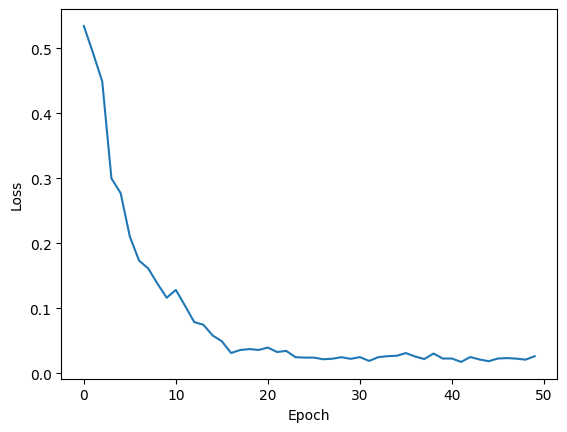

In [16]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(ls)

print('Training Loss is :', ls[-1])
testLoss = []
# the loop is for the case where the test data set has more than one bath, but it doesn't do i guess its fine to keep it in case.
for index, (feature, label) in enumerate(test_dataloader):
    z = model(feature)
    loss = loss_fn(z, label)
    loss.backward()  # computes the gradient
    optimizer.step()  # update params by -lr * gradient
    optimizer.zero_grad()  # zero out the gradient for next iteration
    testLoss.append(loss.item())
print(f"Testing loss is : {testLoss[-1]}")
print(f"Variance between the two: {ls[-1] - testLoss[-1]}")
plt.show()

## Comments
From the above you can see that as the number of epocs increases we can see that the model has a better loss value, although it fluctuates a bit since its a stochastic gradient not a normal gradient

## Extra thing, just for
I will train the model here without batches since it gives us a better graph

Training Loss is : 0.0007072387379594147
Testing loss is : 0.0008472526678815484
Variance between the two: -0.00014001392992213368


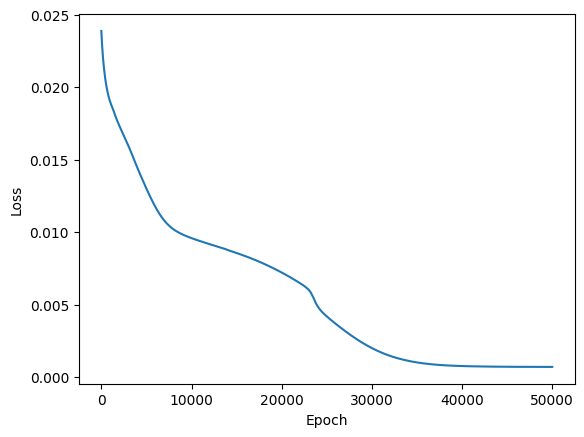

In [17]:
#
# training loop
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
epochs = 50000
ls = []

for epoch in range(epochs):
    z = model(train_features_tensor)
    loss = loss_fn(z, train_target_tensor)
    loss.backward()  # computes the gradient
    optimizer.step()  # update params by -lr * gradient
    optimizer.zero_grad()  # zero out the gradient for next iteration
    ls.append(loss.item())

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(ls)

print('Training Loss is :', ls[-1])

z = model(test_features_tensor)
testLoss = loss_fn(z, test_target_tensor).item()
print(f"Testing loss is : {testLoss}")
print(f"Variance between the two: {ls[-1] - testLoss}")
plt.show()

## Comments
From the above graph you can see that the loss function is decreasing as the epochs increases, and after 50K epochs it eventually stabilizes

# Q2. Classification

Consider the following simulated classification dataset with N = 300 samples labeled with one of three class labels.

In [18]:
%%bash

gdown 1_n5odu1KSpBAqO_Ddbqy2Ty0mG12Dr0A
gdown 1C7GK_uY0srlUdLfHfGa4IZcfthmmdROr

Couldn't find program: 'bash'


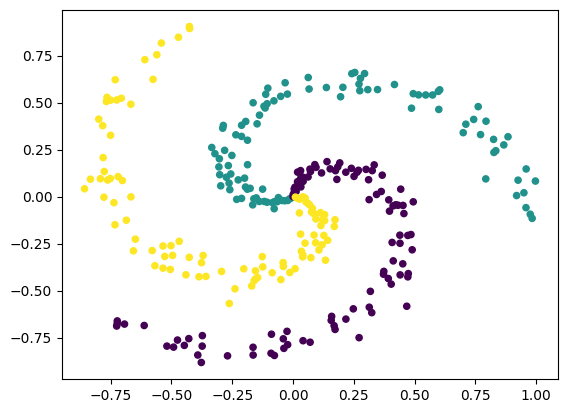

In [19]:
features = (np.load(DATA_DIR / "spiral_features.npy")
            .astype(np.float32))
target = np.load(DATA_DIR / "spiral_target.npy")

# visualize the data
plt.scatter(features[:, 0], features[:, 1], c=target, s=20)
plt.show()

## a) Split the dataset into training and testing sets

Split the dataset into training and testing sets. Keep 80% of the data for training and 20% of the data for testing.

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, test_size=0.2)


In [21]:
X_train

array([[-0.56811047, -0.3677839 ],
       [-0.736659  , -0.03245809],
       [-0.51872903, -0.7952741 ],
       [-0.47525945, -0.76309323],
       [-0.57576287,  0.6232364 ],
       [ 0.2172331 , -0.6516121 ],
       [ 0.57357484,  0.54015267],
       [ 0.1568008 , -0.6583525 ],
       [-0.7313194 ,  0.621286  ],
       [ 0.07012477, -0.7746101 ],
       [-0.05008915, -0.4416129 ],
       [ 0.27707168,  0.62850606],
       [-0.37729448, -0.88231134],
       [-0.4263419 ,  0.9045621 ],
       [ 0.0078066 ,  0.04989807],
       [-0.3212594 ,  0.22799264],
       [-0.19941208,  0.09806904],
       [ 0.95852166,  0.14679371],
       [-0.07865848,  0.5091109 ],
       [ 0.43973505, -0.24841315],
       [ 0.04134551,  0.08096302],
       [ 0.71049964,  0.38494787],
       [ 0.12983231, -0.09624633],
       [-0.15135475, -0.0069701 ],
       [-0.03780131, -0.80719614],
       [ 0.16878037, -0.686631  ],
       [-0.66694474,  0.49115896],
       [ 0.029881  ,  0.06408288],
       [-0.49531823,

In [22]:
y_train

array([2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1,
       2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0,
       2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 0, 2,
       2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 1, 1, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0,
       0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0,
       2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1,
       0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1],
      dtype=uint8)

## b) Train a logistic regression model

Using the provided datasets and dataloaders, build a 3-class logistic regression classifier for this dataset using PyTorch and train it for 2000 epochs using gradient descent.

In [23]:
train_features_tensor = torch.from_numpy(X_train)
train_target_tensor = torch.from_numpy(y_train)

train_dataset = utils.data.TensorDataset(
    train_features_tensor,
    train_target_tensor
)

test_features_tensor = torch.from_numpy(X_test)
test_target_tensor = torch.from_numpy(y_test)

test_dataset = utils.data.TensorDataset(
    test_features_tensor,
    test_target_tensor
)

train_dataloader = utils.data.DataLoader(
    train_dataset,
    batch_size=40,
    shuffle=True
)

test_dataloader = utils.data.DataLoader(
    test_dataset,
    batch_size=40,
    shuffle=False
)

In [24]:
model = nn.Linear(2, 3)
print(model)

Linear(in_features=2, out_features=3, bias=True)


In [25]:
#
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
epochs = 2000
ls = []

for epoch in range(epochs):
    for index, (feature, label) in enumerate(train_dataloader):
        z = model(feature)
        loss = loss_fn(z, label)
        loss.backward()  # computes the gradient
        optimizer.step()  # update params by -lr * gradient
        optimizer.zero_grad()  # zero out the gradient for next iteration

    ls.append(loss.item())
    print(f"Loss value after epoch {epoch}: {ls[-1]}")


Loss value after epoch 0: 0.9715030789375305
Loss value after epoch 1: 0.9841859936714172
Loss value after epoch 2: 0.9898746609687805
Loss value after epoch 3: 1.0122179985046387
Loss value after epoch 4: 1.0065635442733765
Loss value after epoch 5: 0.9846715927124023
Loss value after epoch 6: 1.0266846418380737
Loss value after epoch 7: 1.0190186500549316
Loss value after epoch 8: 0.9991875886917114
Loss value after epoch 9: 1.0603455305099487
Loss value after epoch 10: 0.9735158681869507
Loss value after epoch 11: 1.0002280473709106
Loss value after epoch 12: 0.949217677116394
Loss value after epoch 13: 0.9959136843681335
Loss value after epoch 14: 0.9940892457962036
Loss value after epoch 15: 0.9714763760566711
Loss value after epoch 16: 0.9663537740707397
Loss value after epoch 17: 0.9863889813423157
Loss value after epoch 18: 0.9978646039962769
Loss value after epoch 19: 0.9900661706924438
Loss value after epoch 20: 0.942470371723175
Loss value after epoch 21: 1.0398646593093872


## c) Assess the performance of your logistic regression model

Assess the performance of your model on the training data and the testing data in terms of both loss and accuracy. Comment on the results.

Training Loss is : 0.8005932569503784
Testing loss is : 0.8654252290725708
Variance between the two: -0.06483197212219238


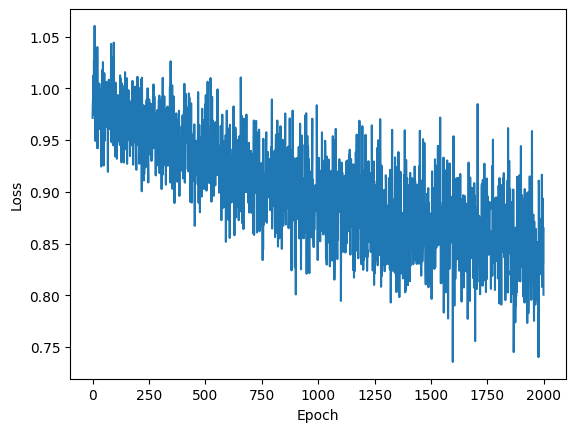

In [26]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(ls)

print('Training Loss is :', ls[-1])
testLoss = []
# the loop is for the case where the test data set has more than one batch, but it doesn't do I guess its fine to keep it in just case.
for index, (feature, label) in enumerate(test_dataloader):
    z = model(feature)
    loss = loss_fn(z, label)
    loss.backward()  # computes the gradient
    optimizer.step()  # update params by -lr * gradient
    optimizer.zero_grad()  # zero out the gradient for next iteration
    testLoss.append(loss.item())
print(f"Testing loss is : {testLoss[-1]}")
print(f"Variance between the two: {ls[-1] - testLoss[-1]}")
plt.show()

## Comments
You can see that the trends looks like it is going down eventually, but its 2000 epochs, so I can't say for sure when it is going to stabilize

## d) Build a neural network classifier 

Build a 3-class classifier using a neural network with one hidden layer of 100 units and a ReLU activation. Train the network with a gradient descent algorithm and for 2000 iterations.

In [27]:
N, D = features.shape
print(N, D)

model = nn.Sequential(
    # input layer
    nn.Linear(2, 100),
    nn.ReLU(),
    # outputLayer
    nn.Linear(100, 3)
)

300 2


In [28]:
#
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
epochs = 2000
ls = []

for epoch in range(epochs):
    for index, (feature, label) in enumerate(train_dataloader):
        z = model(feature)
        loss = loss_fn(z, label)
        loss.backward()  # computes the gradient
        optimizer.step()  # update params by -lr * gradient
        optimizer.zero_grad()  # zero out the gradient for next iteration

    ls.append(loss.item())
    print(f"Loss value after epoch {epoch}: {ls[-1]}")


Loss value after epoch 0: 1.1089831590652466
Loss value after epoch 1: 1.0401642322540283
Loss value after epoch 2: 1.1105566024780273
Loss value after epoch 3: 1.1155651807785034
Loss value after epoch 4: 1.0630617141723633
Loss value after epoch 5: 1.1200823783874512
Loss value after epoch 6: 1.0738404989242554
Loss value after epoch 7: 1.0646421909332275
Loss value after epoch 8: 1.06015944480896
Loss value after epoch 9: 1.0814273357391357
Loss value after epoch 10: 1.0759061574935913
Loss value after epoch 11: 1.0648761987686157
Loss value after epoch 12: 1.0914371013641357
Loss value after epoch 13: 1.1031763553619385
Loss value after epoch 14: 1.063245177268982
Loss value after epoch 15: 1.0916359424591064
Loss value after epoch 16: 1.101735234260559
Loss value after epoch 17: 1.0802314281463623
Loss value after epoch 18: 1.0617069005966187
Loss value after epoch 19: 1.098698377609253
Loss value after epoch 20: 1.0502090454101562
Loss value after epoch 21: 1.0593640804290771
Los

## e) Assess the performance of your neural network

Assess the performance of your neural network on the training data and the testing data in terms of both loss and accuracy. Comment on the results.

Training Loss is : 0.5691174864768982
Testing loss is : 0.7343862056732178
Variance between the two: -0.16526871919631958


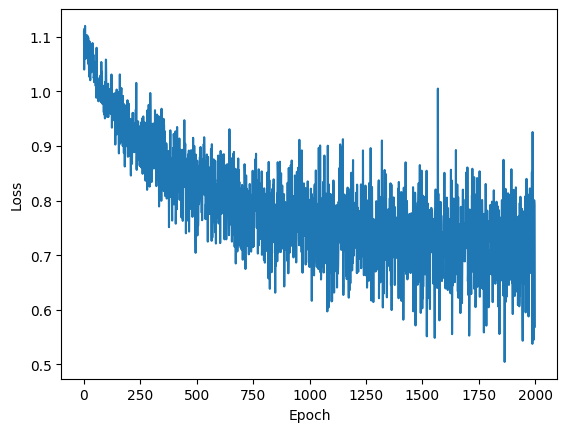

In [29]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(ls)

print('Training Loss is :', ls[-1])
testLoss = []
# the loop is for the case where the test data set has more than one batch, but it doesn't do I guess its fine to keep it in just case.
for index, (feature, label) in enumerate(test_dataloader):
    z = model(feature)
    loss = loss_fn(z, label)
    loss.backward()  # computes the gradient
    optimizer.step()  # update params by -lr * gradient
    optimizer.zero_grad()  # zero out the gradient for next iteration
    testLoss.append(loss.item())
print(f"Testing loss is : {testLoss[-1]}")
print(f"Variance between the two: {ls[-1] - testLoss[-1]}")
plt.show()

## Comments
You can see that the trends looks like it is going down eventually, but its 2000 epochs, so I can't say for sure when it is going to stabilize, basically the same as the linaer model

## e) Interpret the confusion matrix

Compute the confusion matrix for your classifier on both the training and testing data and interpret the results. You may either code your own confusion matrix or use the following function from Scikit-Learn.

In [30]:
from sklearn import metrics

In [31]:
y_hat = nn.functional.softmax(model(train_features_tensor), dim=1)
pred = torch.argmax(y_hat, dim=1)
accuracy = torch.sum((pred == train_target_tensor)) / len(pred)
print('Training accuracy: ', accuracy.item() * 100, '%')
#print(pred., train_target_tensor.item())

# calculate confusion matrix
cm = metrics.confusion_matrix(train_target_tensor, pred)

# print the confusion matrix
print(cm)

Training accuracy:  56.66666626930237 %
[[40 27  7]
 [ 2 46 32]
 [29  7 50]]


## Comments
You can see that the results are that good, because there was no data pre processing.

In [32]:
y_hat = nn.functional.softmax(model(test_features_tensor), dim=1)
pred = torch.argmax(y_hat, dim=1)
accuracy = torch.sum((pred == test_target_tensor)) / len(pred)
print('Testing accuracy: ', accuracy.item() * 100, '%')
#print(pred., train_target_tensor.item())

# calculate confusion matrix
cm = metrics.confusion_matrix(test_target_tensor, pred)

# print the confusion matrix
print(cm)

Testing accuracy:  58.33333134651184 %
[[13 10  3]
 [ 1 12  7]
 [ 3  1 10]]


# Comments
Same as the above matrix

## f) Create your own deep neural network!

Create your own deep neural network and try to get as high an accuracy score on the test set as possible. Be creative: this is an opportunity for you to demonstrate what you can do!

In [40]:
features = (np.load(DATA_DIR / "spiral_features.npy")
            .astype(np.float32))
target = np.load(DATA_DIR / "spiral_target.npy")


In [41]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, target, test_size=0.2)


In [42]:
# pre processing, add a sin wave for both features
# drop old features
newFeatures = np.column_stack(
    (np.sin(features[:, 0]).reshape(-1, 1),
     np.sin(features[:, 1]).reshape(-1, 1),
     ))
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    newFeatures, target, test_size=0.2)

# make X and y torch tensors
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [43]:
N, D = newFeatures.shape
print(N, D)

model = nn.Sequential(
    # input layer
    nn.Linear(D, 100),
    nn.ReLU(),
    nn.Linear(100, 90),
    nn.ReLU(),
    # outputLayer
    nn.Linear(90, 3)
)
print(model)

300 2
Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=90, bias=True)
  (3): ReLU()
  (4): Linear(in_features=90, out_features=3, bias=True)
)


Training Loss is : 0.006567380391061306
Testing loss is : 0.09545149654150009
Variance between the two: -0.08888411615043879


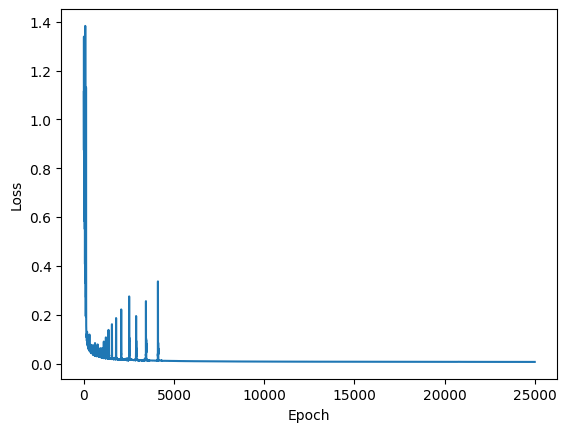

In [44]:
#
# training loop
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1)
epochs = 25000
ls = []

for epoch in range(epochs):
    z = model(X_train)
    loss = loss_fn(z, y_train)
    loss.backward()  # computes the gradient
    optimizer.step()  # update params by -lr * gradient
    optimizer.zero_grad()  # zero out the gradient for next iteration
    ls.append(loss.item())

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(ls)

print('Training Loss is :', ls[-1])

z = model(X_test)
testLoss = loss_fn(z, y_test).item()
print(f"Testing loss is : {testLoss}")
print(f"Variance between the two: {ls[-1] - testLoss}")
plt.show()

In [45]:
y_hat = nn.functional.softmax(model(X_train), dim=1)
pred = torch.argmax(y_hat, dim=1)
accuracy = torch.sum((pred == y_train)) / len(pred)
print('Training accuracy: ', accuracy.item() * 100, '%')
#print(pred., train_target_tensor.item())

# calculate confusion matrix
cm = metrics.confusion_matrix(y_train, pred)

# print the confusion matrix
print(cm)

Training accuracy:  99.58333373069763 %
[[73  1  0]
 [ 0 81  0]
 [ 0  0 85]]


In [46]:
y_hat = nn.functional.softmax(model(X_test), dim=1)
pred = torch.argmax(y_hat, dim=1)
accuracy = torch.sum((pred == y_test)) / len(pred)
print('Testing accuracy: ', accuracy.item() * 100, '%')
#print(pred., train_target_tensor.item())

# calculate confusion matrix
cm = metrics.confusion_matrix(y_test, pred)

# print the confusion matrix
print(cm)

Testing accuracy:  98.33333492279053 %
[[26  0  0]
 [ 0 19  0]
 [ 0  1 14]]


# Comments
Adding a sin wave has made the neural network an almost perfect match for the data we currently have, hopefully it can be generlized for more features.